# MAPS
https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

# DATA FROM
https://www.arcgis.com/home/item.html?id=acb8cb18e7cd45c982086b6ef2bb5a62

# SHAPEFILE
https://wiki.openstreetmap.org/wiki/Shapefiles


In [2]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import random # functions that use and generate random numbers
import glob # lists names in folders that match Unix shell patterns
import re # module to use regular expressions, 
import os # allow changing, and navigating files and folders, 
import seaborn as sns # advance plots, for statistics,
import scipy.stats as stats  # library for statistics and technical programming, 
%matplotlib inline

# set dir with data and info,
PATH = '/Users/pawel/Desktop/Activities/005__COURSES/000__EPFLext_ADSML/Module 4 __ ML 2/M4 S06 Clustering and Dimensionality Reduction/M4 S06 DATA Clustering and Dimensionality Reduction'
os.chdir(PATH)


In [33]:
# required libraries
import numpy as np
import pandas as pd
import shapefile as shp # pyshp library, I dont know why the name is different :P
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Step 1.  Prepare enviroement and load the data
# ------   -----------------------------------------------------

# a) Initializing Visualization Set
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

# b) opening the vector map
# - A vector map is a group of several files with a .shp format.
shp_path = 'District_boundary/District_Boundary.shp' # there are many more files in that directory

# c) reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)


# d) Explore the data; 
len(sf.shapes()) # Number of different shapes which were imported by shp.reader
        #    The result will come out to be 33 which tells us that there 
        #.   are 33 shapes or we can say cities in the region of Rajasthan
sf.records()[0:5]
        #    [Record #0: ['JAISALMER', 'RAJASTHAN', 508247, 38487.17, 1],
        #     Record #1: ['BARMER', 'RAJASTHAN', 1964835, 28550.95, 2],
        #     Record #2: ['JALOR', 'RAJASTHAN', 1448940, 10647.4, 3],
        #     Record #3: ['DUNGARPUR', 'RAJASTHAN', 1107643, 3770.78, 4],
        #     Record #4: ['JHALAWAR', 'RAJASTHAN', 1180323, 6315.27, 5]]
# To explore a particular record where 1 is the Id or row number and 0 refers to the column:
sf.records()[1][0]
        #     'BARMER'

'BARMER'

In [52]:
# Step 2. Converting Shapefile Data Into Pandas Dataframes:
# ------   ------------------------------------------------------

# a) Making accessing cities easier by converting shapefile data 
#.   into a more relatable Pandas Dataframe format


# Function ....................................
def read_shapefile(sf):
    
    # fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
    
    # fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    
    # converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
    
    #assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape # (33, 6)
df.head()

"""
    sample of a data representation the last point has the coordinates 
    of the data latitude and longitude which will be used to create a specific map shape
    
    cords - the latitude and longitudes which will be used to create the map.
"""

df.sample(5)

DIST_NAME STATE_NAME  POPULATION  AREA_SQ_KM  ID  \
6        BUNDI  RAJASTHAN      962620     5776.48   7   
13  JHUNJHUNUN  RAJASTHAN     1913689     5911.03  14   
21       ALWAR  RAJASTHAN     2986982     8382.86  22   
7         TONK  RAJASTHAN     1211547     7190.38   8   
12       CHURU  RAJASTHAN     1688266    13844.05  13   

                                               coords  
6   [(597450.3749416292, 2861940.9998981967), (597...  
13  [(562361.6248805159, 3154056.499825264), (5623...  
21  [(634242.8751614639, 2993115.249896262), (6342...  
7   [(524982.2500702137, 2884888.2497936687), (524...  
12  [(541766.9376083581, 3208035.749954137), (5418...

In [87]:
# Step 3. Plotting The Map Of a City In Rajasthan 
#.        Or a Specific Shape With The Help Of Matplotlib
# ------  -----------------------------------------------------------------------


# Function ......................................................

def plot_shape(sf, id, s=None):
    
    """
          This function plots one shape stored in shapefile, 
          it correspondes to one city(district), ie. something that woudl ve stored in one row after 
          converting shapefile into df, (cell above). First, we extract that shape using shapefile.shape(index_number)
          and then, we extract points that are stores in array as tupple (longitude, lattidute) paris each, 
          names are not provided here, 
          ... 
          Plots the shape (polygon) based on the city’s coordinates 
          and, calculates and return the medium point of that specific shape (x0, y0).
          This medium point is also used to define where to print the city name
          ...
          sf = shapefile, 
          id = shape number in shapefile, after converting it to df, 
               this woudl be row number, 
          s  = text that we wish to add to plotted shape 
    """
    
    #### Prtepare the data, 
    
    # - 1 - extract one shape from shapefile 
    shape_ex = sf.shape(id)

    
    
    # - 2 - Create arrays to store extracted daata points for Longitude and Lattitude cooordinates,
    
    # ... Longitude, where: shape_ex.points : returns arrays with pairs of points used to plot a shape
    x_lon = np.zeros((len(shape_ex.points),1))
    
    # ... lattitude data, same as above
    y_lat = np.zeros((len(shape_ex.points),1))
    
    # ... extract longitude and lattitude data from each 
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

        
    #### Plot figure
        
    # - 1 - initiate the figure,     
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    
    # - 2 - Plot the map, 
    plt.plot(x_lon,y_lat) 
    
    # - 3 - Add city name, in the middle
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s=s, fontsize=10)
    
    # - 4 - use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    
    
    #### Return middle coordinates for later on, 
    return x0, y0





# Function ......................................................

def plot_map( sf, x_lim = None, y_lim = None, figsize = (11,9)):
    
    """
        This function combines all the single shapes 
        that were made using coordinates 
        and show it as a combined shape.
        
        sf = shapefile, 
    
    """
    
    # initiate the figure, 
    plt.figure(figsize = figsize)
    
    id=0 # id is needed to display the text, 
    for shape in sf.shapeRecords():
        
        # extract longitude and lattidude points from each pair
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        
        # plot these points, 
        plt.plot(x, y, 'k')
        
        # add district name in the middle of as given shape, 
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
            
        # add one to id, nr, 
        id = id+1
    
    # find x/ylim for an entire plot, 
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        


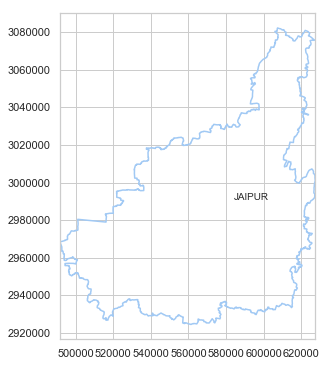

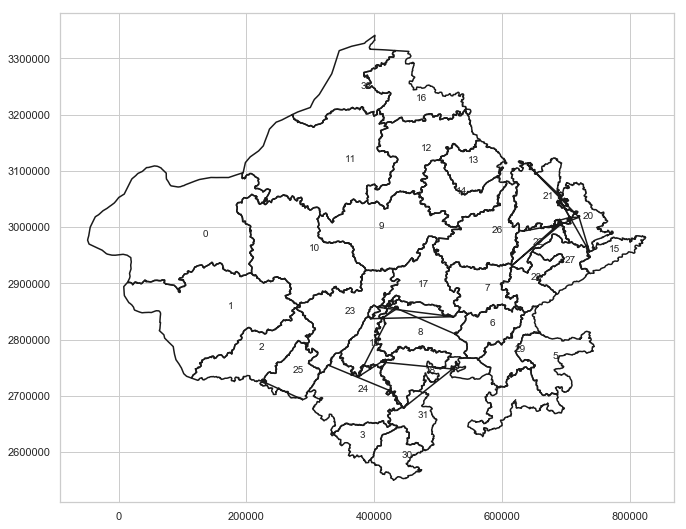

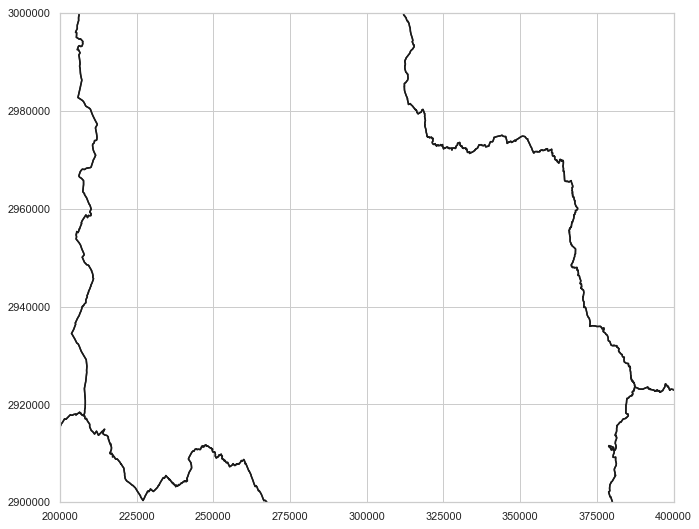

In [89]:
#### testign funftions from the above, 
#### ---------------------------------------------------------------

# - 1 - plot_shape

# ..... district name, 
DIST_NAME = 'JAIPUR'

# ..... get, shaope id form df, that we created earilier
com_id = df[df.DIST_NAME == DIST_NAME].index.get_values()[0]

# ..... plot shape
plot_shape(sf=sf, id=com_id, s=DIST_NAME)



# - 2 - plot the entire map, 

# ..... whole map, 
plot_map(sf)

# ..... zoomed map to some coordinates, 
y_lim = (2900000,3000000) # latitude
x_lim = (200000, 400000) # longitude
plot_map(sf, x_lim, y_lim)



# - 3  - THE AUTOHOR PRESENTED MANY MORE FUNCTIONS, THAT CAN BE USED, 
#        INCLUDING COLLOR FILIING AND HEATMAPS, 
#        HOWEVER, I WILL BE NOW GOING TO GEOPANDAS

# Mapping With Geopandas
---

* It combines the capabilities of Pandas and shapely by operating a much more compact code. 
* It is one of the best ways to get started with making choropleth maps.

In [90]:
# EXAMPLE 1. 
# Let’s start with some mapping through Geopandas and let’s map Rajasthan’s population on it!


   DIST_NAME STATE_NAME  POPULATION  AREA_SQ_KM  ID  \
0  JAISALMER  RAJASTHAN      508247    38487.17   1   
1     BARMER  RAJASTHAN     1964835    28550.95   2   
2      JALOR  RAJASTHAN     1448940    10647.40   3   
3  DUNGARPUR  RAJASTHAN     1107643     3770.78   4   
4   JHALAWAR  RAJASTHAN     1180323     6315.27   5   

                                            geometry  
0  POLYGON ((157738.063 2935783.500, 157694.594 2...  
1  POLYGON ((157738.063 2935783.500, 157781.250 2...  
2  POLYGON ((277249.469 2855619.500, 277361.906 2...  
3  POLYGON ((359076.688 2650355.000, 359189.719 2...  
4  POLYGON ((684142.750 2703277.750, 684144.062 2...  
    DISTRICT      POP
0  JAISALMER   508247
1     BARMER  1964835
2      JALOR  1448940
3  DUNGARPUR  1107643
4   JHALAWAR  1180323


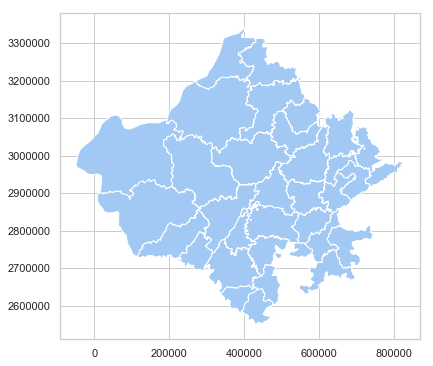

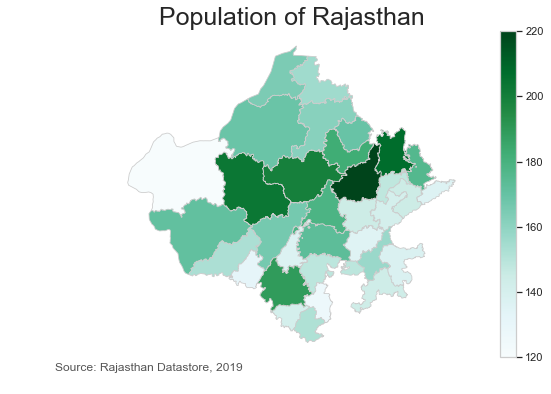

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd # also requires descartes package, 



# Step 1. Getting The Data Of Interest
# ------  -----------------------------------------

"""
    Rajasthan being the largest state of India is a highly populated state. 
    Mapping its population will make visualization much simpler and efficient. 
    Let’s set the path to open the shapefile for the Rajasthan region through Geopandas.
""";

# .. set the filepath and load
fp = os.path.join(PATH,"District_boundary", "District_Boundary.shp")  # PATH was given in the first cell, 

# .. reade the file stored in variable fp
map_df = gpd.read_file(fp) # retrusn pandas df, 

# .. check data type so we can see that this is not a normal dataframe, but a GEOdataframe
print(map_df.head()) # its the same df, as we had prevoiusly, 




# Step 2. Preview the map, 
# ------  -----------------------------------------

# plotting the map of the shape file preview of the maps without data in it
map_df.plot()





# Step 3. Preappre the data to be ploted as colors on a map  
# ------  -----------------------------------------


# - A - Extract the data,  

# ..... select columns from df, required to plot the data, 
data_for_map = map_df.loc[:,['DIST_NAME','POPULATION']]

# ..... rename these collumns, - neded because we will join map_df and data_for_map into one df, used by the function, 
data_for_map = data_for_map.rename(index=str, columns={"DIST_NAME": "DISTRICT","POPULATION": "POP"})
print(data_for_map.head())



# - B - merge map_df & data_for_map
merged_df = map_df.set_index("DIST_NAME").join(data_for_map.set_index("DISTRICT"))
merged_df.head() # OK
merged_df.shape  # (33, 6)



# Step 4. Plot the map with choropleth
# ------  -----------------------------------------


# - A - PLOT THE MAP,

# set a variable that will call whatever column we want to visualise on the map
variable = "POP"

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

merged_df.plot(
    column=variable, 
    cmap='BuGn', 
    linewidth=0.8, 
    ax=ax, 
    edgecolor="0.8"
)



# - B - BEAUTIFICATION,

# remove the axis
ax.axis("off")

# add a title
ax.set_title("Population of Rajasthan", 
             fontdict={"fontsize": "25", "fontweight" : "3"}
            )

# create an annotation for the data source (small text in the left bottom corner)
ax.annotate("Source: Rajasthan Datastore, 2019",
            xy=(0.1, .08), 
            xycoords="figure fraction", 
            horizontalalignment="left", 
            verticalalignment="top", 
            fontsize=12, 
            color="#555555"
           )

# COLORBAR, 

sm = plt.cm.ScalarMappable(
    cmap="BuGn", 
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)



# - C - SAVCE THE MAP AS PNG FILE, 
fig.savefig("map_export.png", dpi=300)

# Mapping With Basemap
---
https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

The Matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own but provides the facilities to transform coordinates to one of 25 different map projections. Matplotlib is then used to plot contours, images, vectors, lines or points in the transformed coordinates. Shoreline, river and political boundary datasets are provided, along with methods for plotting them.

## Different tyoes of maop projections available wth basemap:
https://matplotlib.org/basemap/users/mapsetup.html

## Basemap User Guide
https://matplotlib.org/basemap/users/index.html

## Basemap tutorial - i havent followed
https://rabernat.github.io/research_computing/intro-to-basemap.html

# PyNIO and PyNGL
---
### PyNGL - python mopdule for creating high resolution visualisation of scientiffic data
### PyNIO - python module used to read and write different formats of data, 

http://www.pyngl.ucar.edu
    

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd

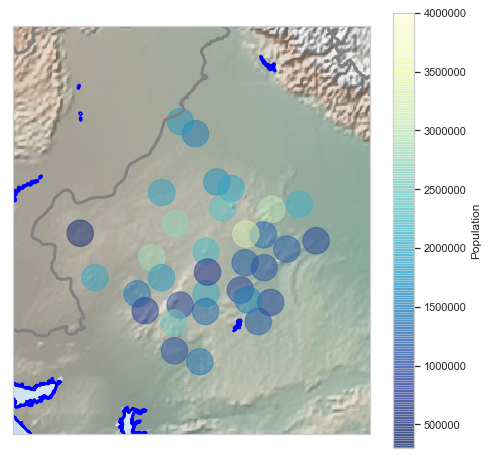

In [165]:
# import shapefile with district in india and csv file with some example data to plot on the map, 
city  = gpd.read_file(os.path.join(PATH,"District_boundary", "District_Boundary.shp"))
csv   = pd.read_csv(os.path.join(PATH,"District_boundary", "Cities_in_India.csv"))
csv.head()

# extract data to plot, and store in np.array
lat        =csv['LAT'].values
lon        =csv['LONG'].values
population = city['POPULATION'].values
dist       =city['DIST_NAME'].values

# set up the map projection, scatter the data, and then create a colour bar
fig  = plt.figure(figsize=(8, 8))
m    = Basemap(
    projection='lcc', # 25 different tyes of projecttion is available, 
    resolution='h',   # ``c`` (crude), ``l`` (low), ``i`` (intermediate), ``h`` (high), ``f`` (full) or None.
    lat_0=27.0238,    # center of desired map domain (in degrees).
    lon_0=74.2179,    # -||-
    width=1.05E6, 
    height=1.2E6
)
m.shadedrelief()

# add some details to it and separate the boundaries.
m.drawcoastlines(color='blue',linewidth=3)
m.drawcountries(color='gray',linewidth=3)
m.drawstates(color='gray')


# scatter city data, with c reflecting population
m.scatter(lon,lat, latlon=True,
          c=population,s=700,
          cmap='YlGnBu_r', alpha=0.5)
#create colorbar 
plt.colorbar(label=r'Population')
plt.clim(300000, 4000000)

In [1]:
# 
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map.

fig  = plt.figure(figsize=(30, 15))

# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')


# cosatlines, countries, 
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='steelblue')
m.drawcountries(color='black',linewidth=1)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Miller Cylindrical Projection")


plt.show()

<Figure size 3000x1500 with 1 Axes>

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors
earth_colors = np.array([(199, 233, 192),
                                (161, 217, 155),
                                (116, 196, 118),
                                (65, 171, 93),
                                (35, 139, 69),
                                ]) / 255.
earth_colors = itertools.cycle(earth_colors)



ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    print country.attributes['name_long'], earth_colors.next()
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=earth_colors.next(),
                      label=country.attributes['name_long'])

plt.show()

SyntaxError: invalid syntax (<ipython-input-4-fc40f101e68f>, line 24)

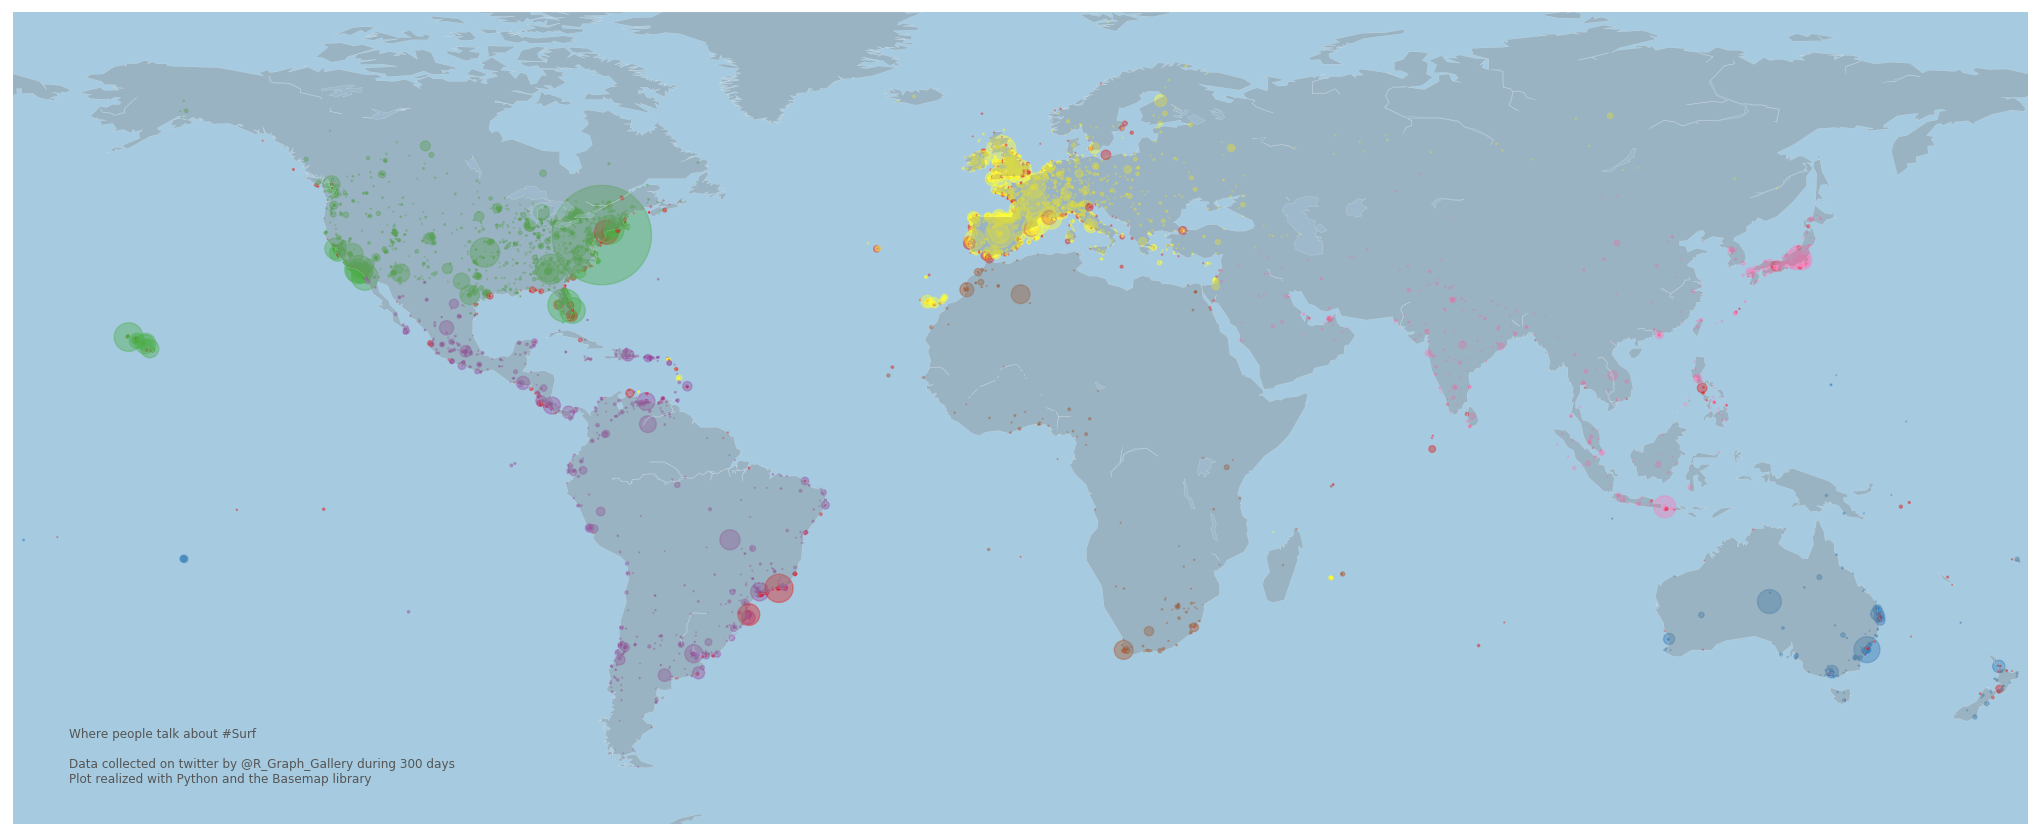

In [5]:
# Libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 
# Save as png
plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')


In [174]:
data.head()

homelon  homelat  homecontinent   n  labels_enc
0  -178.12   -14.29      Australia  10           0
1  -172.10   -13.76            NaN   2          -1
2  -159.72    21.97            NaN   6          -1
3  -159.59    21.91  North America   4           1
4  -159.53    22.10  North America  37           1

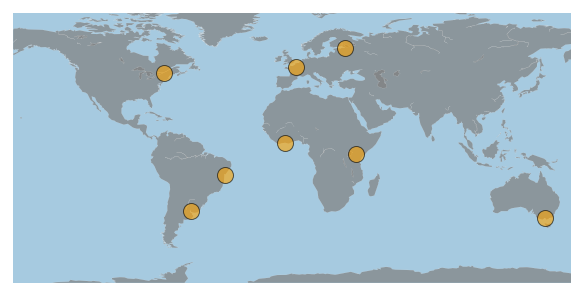

In [171]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
 
# Make a data frame with the GPS of a few cities:
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
 
# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data['lat'], data['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)

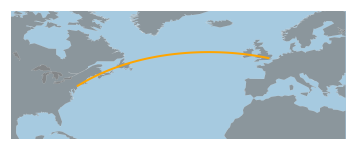

In [6]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
 
# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20,urcrnrlon=30,urcrnrlat=70)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='orange')


Creating a map of the world’s top ten most populated cities with Matplotlib and Basemap.     
Data from: http://en.wikipedia.org/wiki/List_of_metropolitan_areas_by_population   
https://gist.github.com/fogonwater/5139689 

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# lon_0 is central longitude of robinson projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
#set a background colour
m.drawmapboundary(fill_color='#85A6D9')

# draw coastlines, country boundaries, fill continents.
m.fillcontinents(color='white',lake_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawcountries(color='#6D5F47', linewidth=.4)

# draw lat/lng grid lines every 30 degrees.
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')

# lat/lon coordinates of top ten world cities
lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2]
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5]
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions

# compute the native map projection coordinates for cities
x,y = m(lngs,lats)

#scale populations to emphasise different relative pop sizes
s_populations = [p * p for p in populations]

#scatter scaled circles at the city locations
m.scatter(
    x,
    y,
    s=s_populations, #size
    c='blue', #color
    marker='o', #symbol
    alpha=0.25, #transparency
    zorder = 2, #plotting order
    )

# plot population labels of the ten cities.
for population, xpt, ypt in zip(populations, x, y):
    label_txt = int(round(population, 0)) #round to 0 dp and display as integer
    plt.text(
        xpt,
        ypt,
        label_txt,
        color = 'blue',
        size='small',
        horizontalalignment='center',
        verticalalignment='center',
        zorder = 3,
        )
        
#add a title and display the map on screen
plt.title('Top Ten World Metropolitan Areas By Population')
plt.show()